<a href="https://colab.research.google.com/github/ranjithdurgunala/DVT/blob/main/DVT-plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matplotlib is a powerful and very popular data visualization library in Python.
Data visualization is an essential skill for all data analysts and Matplotlib is one of the most popular libraries for creating visualizations.

The library *seaborn* is a great option as it builds on top of Matplotlib to create visualizations more quickly.

### Load the csv file. We will load in the csv file, named HistoricalPrices.csv using the pandas library and view the first rows using the .head() method.

In [2]:
import pandas as pd

djia_data = pd.read_csv('/content/HistoricalPrices.csv')
djia_data.head()

,Date,Open,High,Low,Close
0,02/07/25,44762.57,44857.11,44279.78,44303.40
1,02/06/25,44949.19,44966.63,44545.27,44747.63
2,02/05/25,44563.63,44886.88,44352.99,44873.28
3,02/04/25,44469.46,44597.71,44328.52,44556.04
4,02/03/25,44268.15,44594.54,43879.06,44421.91


Loading matplotlib

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

Use the rename() method in pandas as the dataset we downloaded has an extra space in the column names.

In [6]:
djia_data = djia_data.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})

We will also ensure that the Date variable is a datetime variable and sort in ascending order by the date.  

In [8]:
djia_data['Date'] = pd.to_datetime(djia_data['Date'])
djia_data = djia_data.sort_values(by = 'Date')

<ipython-input-8-68b0014f47ed>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  djia_data['Date'] = pd.to_datetime(djia_data['Date'])


Line Plots with a Single Line

We can create a line plot in matplotlib using the plt.plot() method where the first argument is the x variable and the second argument is the y variable in our line plot. Whenever we create a plot, we need to make sure to call plt.show() to ensure we see the graph we have created.

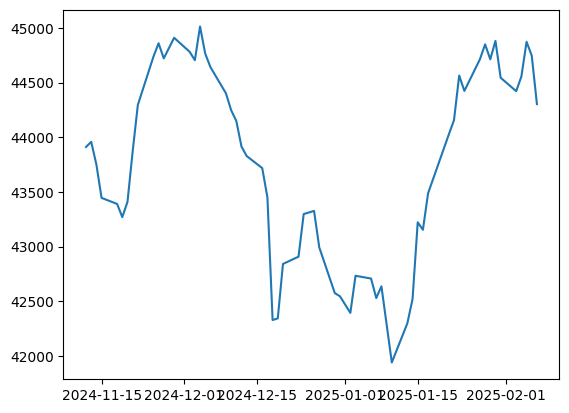

In [10]:
plt.plot(djia_data['Date'], djia_data['Close'])
plt.show()

Line Plots with Multiple Lines

We can visualize multiple lines on the same plot by adding another plt.plot() call before the plt.show() function.

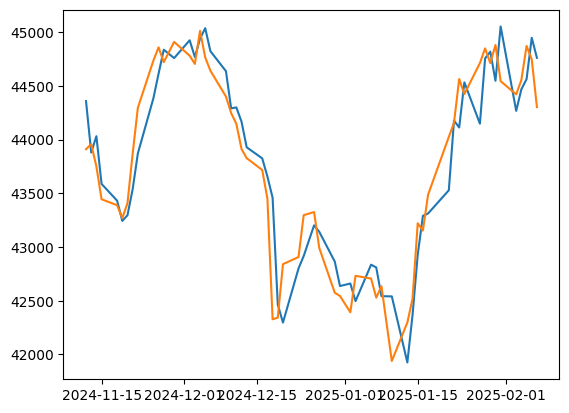

In [11]:
plt.plot(djia_data['Date'], djia_data['Open'])
plt.plot(djia_data['Date'], djia_data['Close'])


plt.show()

Adding a Legend :
If we want to distinguish which line represents which column, we can add a legend. This will create a color coded label in the corner of the graph. We can do this using plt.legend() and adding label parameters to each plt.plot() call.

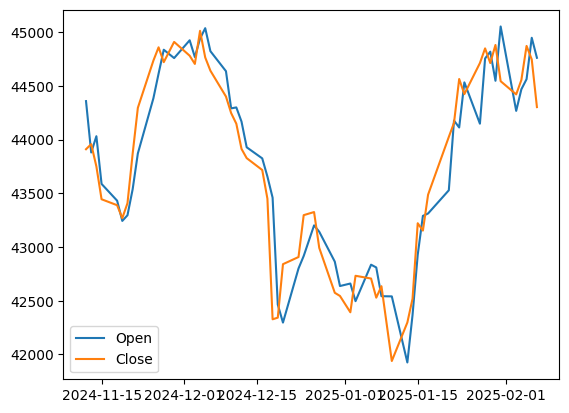

In [9]:
plt.plot(djia_data['Date'], djia_data['Open'], label = 'Open')
plt.plot(djia_data['Date'], djia_data['Close'], label = 'Close')
plt.legend()
plt.show()

Drawing Bar Plots

Bar plots are very useful for comparing numerical values across categories. They are particularly helpful for finding the largest and smallest categories.

We will aggregate the data into monthly averages using pandas so that we can compare monthly performance during 2022 for the DJIA. We will also use the first 6 months to make the data easier to visualize.

In [12]:
# Import the calendar package
from calendar import month_name

# Order by months by chronological order
djia_data['Month'] = pd.Categorical(djia_data['Date'].dt.month_name(), month_name[1:])

# Group metrics by monthly averages
djia_monthly_mean = djia_data \
    .groupby('Month') \
    .mean() \
    .reset_index()

djia_monthly_mean.head(6)

<ipython-input-12-0e94c6e3404b>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Month') \


,Month,Date,Open,High,Low,Close
0,January,2025-01-17 07:12:00,43469.347,43708.3035,43271.6235,43524.349
1,February,2025-02-05 00:00:00,44602.600,44780.5740,44277.1240,44580.452
2,March,NaT,NaN,NaN,NaN,NaN
3,April,NaT,NaN,NaN,NaN,NaN
4,May,NaT,NaN,NaN,NaN,NaN
5,June,NaT,NaN,NaN,NaN,NaN


We will start by creating a bar chart with vertical bars. This can be done using the plt.bar() method with the first argument being the x-axis variable (Month) and the height parameter being the y-axis (Close).  We then want to make sure to call plt.show() to show our plot.

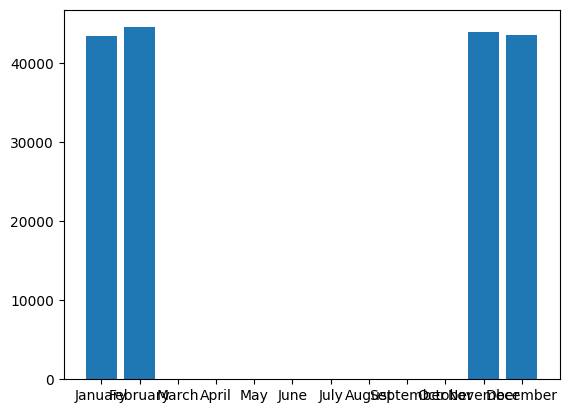

In [13]:
plt.bar(djia_monthly_mean['Month'], height = djia_monthly_mean['Close'])
plt.show()

Drawing Scatter Plots

Scatterplots are very useful for identifying relationships between 2 numeric variables. This can give you a sense of what to expect in a variable when the other variable changes and can also be very informative in your decision to use different modeling techniques such as linear or non-linear regression.  

Scatter Plots
Similar to the other plots, a scatter plot can be created using pyplot.scatter() where the first argument is the x-axis variable and the second argument is the y-axis variable. In this example, we will look at the relationship between the open and close price of the DJIA.

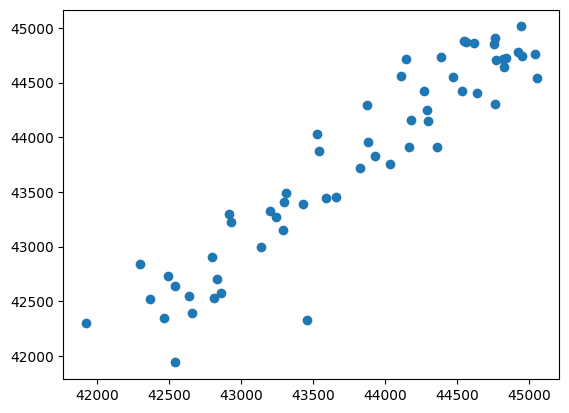

In [14]:
plt.scatter(djia_data['Open'], djia_data['Close'])
plt.show()

Scatter Plots with a Trend Line

We will add a trend line to the graph to show the linear relationship between the open and close variables more explicitly. To do this, we will use the numpy polyfit() method and poly1d(). The first method will give us a least squares polynomial fit where the first argument is the x variable, the second variable is the y variable, and the third variable is the degrees of the fit (1 for linear). The second method will give us a one-dimensional polynomial class that we can use to create a trend line using plt.plot().

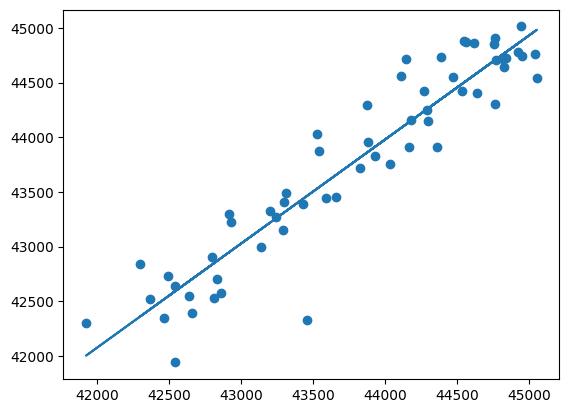

In [15]:
z = np.polyfit(djia_data['Open'], djia_data['Close'], 1)
p = np.poly1d(z)


plt.scatter(djia_data['Open'], djia_data['Close'])
plt.plot(djia_data['Open'], p(djia_data['Open']))
plt.show()